In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [19]:
df = pd.read_csv('neo.csv')
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [20]:
data_types = df.dtypes
data_types
# Point to note: All distances (diameter, miss distance) are in kilometers
# Velocity is in meters per second

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [21]:
x = df[df.isna().any(axis=1)]
x

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous


In [22]:
print('Distance Ranges: ', min(df['miss_distance']), 'to ', max(df['miss_distance']))
print('Mean:', df['miss_distance'].mean())
print('Median:', df['miss_distance'].median())

Distance Ranges:  6745.532515957 to  74798651.4521972
Mean: 37066546.03042213
Median: 37846579.263426416


In [23]:
hazardous = df[df['hazardous'] == True]
safe = df[df['hazardous'] == False]

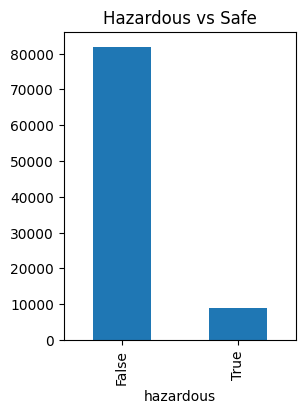

In [24]:
ax = df['hazardous'].value_counts().plot(kind='bar',
                                         figsize=(3, 4),
                                         title='Hazardous vs Safe')


In [25]:
print('Minimum Hazardous Distance:', min(hazardous['miss_distance']))
print('Maximum Hazardous Distance:', max(hazardous['miss_distance']), '\n')
print('Minimum Safe Distance:', min(safe['miss_distance']))
print('Maximum Safe Distance:', max(safe['miss_distance']))

Minimum Hazardous Distance: 143272.707498743
Maximum Hazardous Distance: 74790952.60725467 

Minimum Safe Distance: 6745.532515957
Maximum Safe Distance: 74798651.4521972


In [26]:
# df = pd.DataFrame(data)

# # Separate majority and minority classes
# df_majority = df[df['class'] == 0]
# df_minority = df[df['class'] == 1]

# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                    replace=False,    # sample without replacement
#                                    n_samples=len(df_minority), # match minority class
#                                    random_state=42)  # for reproducibility

# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# # Display new class counts
# print(df_downsampled['class'].value_counts())

In [27]:
required_data = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'sentry_object', 'absolute_magnitude', 'hazardous']]
majority = required_data[required_data['hazardous'] == False]
minority = required_data[required_data['hazardous'] == True]
majority_downsampled = resample(majority, 
                                replace=False, 
                                n_samples=len(hazardous))

new_df = pd.concat([majority_downsampled, minority], axis=0, ignore_index=True)

In [28]:
X = new_df.drop(columns=['hazardous'])
y = new_df['hazardous']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ' + str(round(accuracy * 100, 2)) + '%')
print('Precision: ' + str(round(precision * 100, 2)) + '%')
print('Recall: ' + str(round(recall * 100, 2)) + '%')


Accuracy: 81.31%
Precision: 81.83%
Recall: 81.6%


In [39]:
hyperparameters = model.get_params()

13
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
monotonic_cst None
random_state None
splitter best


In [41]:
import mlflow
from mlflow.models import infer_signature

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")


# Create a new MLflow Experiment
mlflow.set_experiment("Nasa")

# Start an MLflow run
with mlflow.start_run():
    mlflow.log_params(hyperparameters)
    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for NASA near earth objects")

    # Infer the model signature
    signature = infer_signature(X_train, model.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="nasa_near_earth",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )
# Logging model, parameters and metrics, pushing to production, using registered model for inference
# Push the code to that

Registered model 'tracking-quickstart' already exists. Creating a new version of this model...
2024/08/15 15:46:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 6
Created version '6' of model 'tracking-quickstart'.
2024/08/15 15:46:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run victorious-owl-986 at: http://127.0.0.1:5000/#/experiments/277988104319681288/runs/ebda90dafbf245eca65cbb29095e5ebd.
2024/08/15 15:46:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/277988104319681288.
